In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
title_desc = {}
exp_desc = {}
title_desc["top1_acc"] = "Top 1 accuracy"
title_desc["top2_acc"] = "Top 2 accuracy"
title_desc["top3_acc"] = "Top 3 accuracy"
exp_desc["alpha"] = "Alpha parameter"
exp_desc["beta"] = "Beta parameter"
exp_desc["context"] = "Context length"
exp_desc["epoch"] = "Number of epochs"
num_shuffles = 30

In [3]:
def calc_top_std_and_range(experiments_path_prefix, top_k, experiment):
    top_acc = None
    values =  None
    
    for i in range(num_shuffles):
        results_df = pd.read_csv("{}{}/results.csv".format(experiments_path_prefix, i))
        if top_acc is None:
            top_acc = results_df[top_k]
        else:
            top_acc = top_acc + results_df[top_k]
        if values is None:
            values = np.zeros((top_acc.size, num_shuffles))

        for j in range(results_df[top_k].size):
            values[j][i] = results_df[top_k][j]
            
    return top_acc/num_shuffles, np.std(values, axis=1), results_df[experiment]

### Baseline values

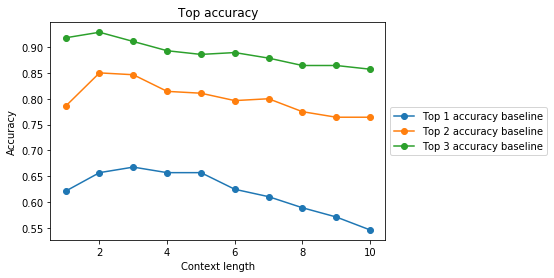

max top1_acc = 0.6678571428571428 at context = 3 
max top2_acc = 0.85 at context = 2 
max top3_acc = 0.9285714285714286 at context = 2 


In [39]:
tested_top_ks = ["top1_acc", "top2_acc", "top3_acc"]
experiment = "context"
experiment_path = "../baseline/contexts3/"
results_df = pd.read_csv(experiment_path + 'results.csv')
for top_k in tested_top_ks:
    plt.plot(results_df[experiment], results_df[top_k], 'o-', label="{} baseline".format(title_desc[top_k]))
plt.xlabel(exp_desc[experiment])
plt.ylabel('Accuracy')
plt.title('Top accuracy')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('baseline_{}_top_acc.png'.format(experiment), bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()


for top_k in tested_top_ks:
    max_acc = results_df[top_k].max()
    print('max {} = {} at {} = {} '.format(top_k, max_acc, experiment,results_df[experiment][results_df[top_k].idxmax()]))
    

### Experiment 1 - alpha optimization over different contexts

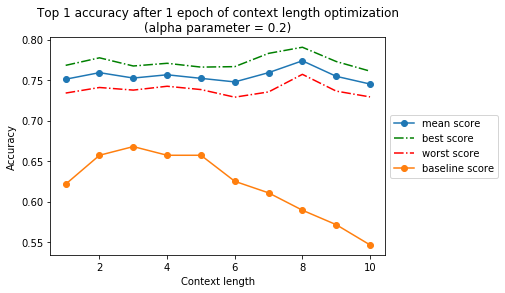

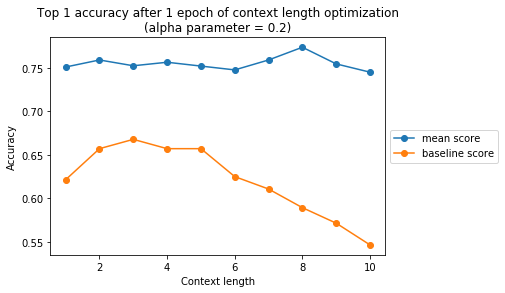

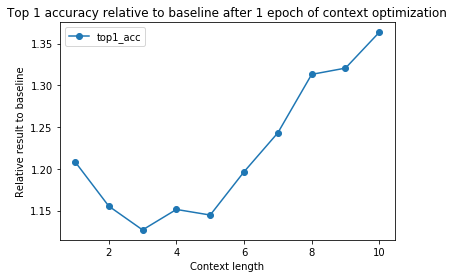

Min improvement: 1.1267379679144387
Max improvement: 1.3636165577342052


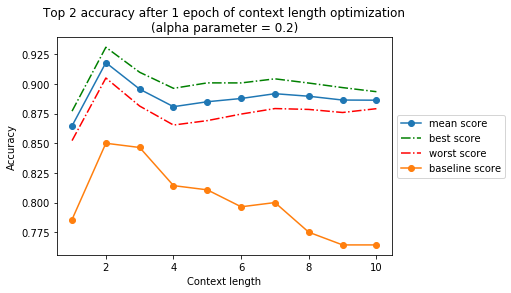

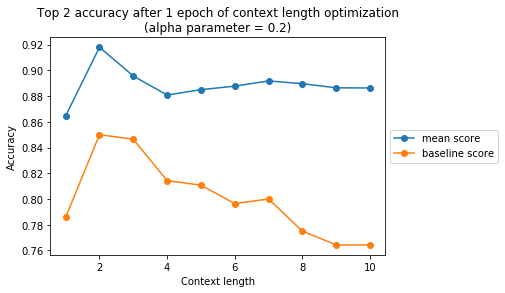

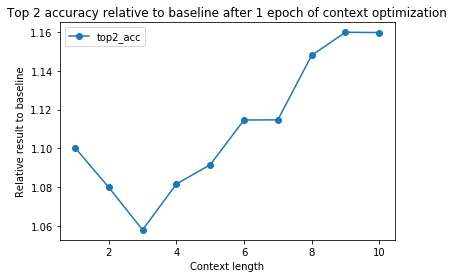

Min improvement: 1.0580872011251758
Max improvement: 1.1598130841121492


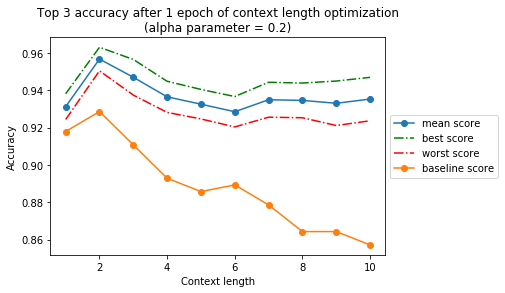

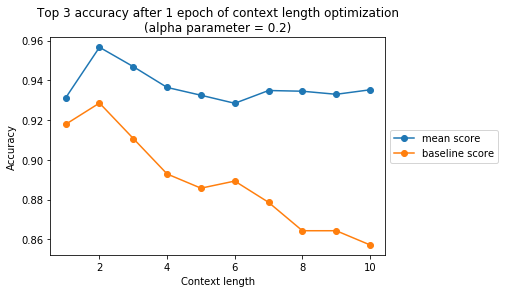

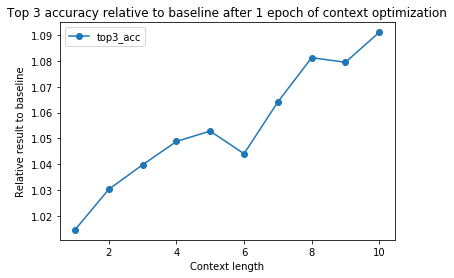

Min improvement: 1.014526588845655
Max improvement: 1.0911111111111107


In [40]:
tested_top_ks = ["top1_acc", "top2_acc", "top3_acc"]
baseline_path = "../baseline/contexts3/"
experiment = "context"
experiment_no = 1
subexperiment_no = 1
experiment_path_prefix = "../experiment{}/{}{}_".format(experiment_no, experiment, subexperiment_no)
with open(experiment_path_prefix + "0/args.txt") as f:
    data = json.load(f)
    alpha = data["alpha"]
    used_parameters = "\n(" + exp_desc['alpha'].lower() + " = " + str(alpha) + ")"

for top_k in tested_top_ks:
    for use_std in [True, False]:
        fig_name = 'exp{}_{}_{}.png'.format(experiment_no, experiment, top_k)
        top_acc, std, tested_range = calc_top_std_and_range(experiment_path_prefix, top_k, experiment)
        plt.plot(tested_range, top_acc, 'o-', label="mean score")
        if use_std:
            plt.plot(tested_range, top_acc + 2*std, 'g-.', label="best score")
            plt.plot(tested_range, top_acc - 2*std, 'r-.', label="worst score")
            fig_name = 'exp{}_{}_{}_with_std.png'.format(experiment_no, experiment, top_k)

        results_df = pd.read_csv(baseline_path + 'results.csv')
        plt.plot(results_df[experiment], results_df[top_k], 'o-', label="baseline score")


        plt.xlabel(exp_desc[experiment])
        plt.ylabel('Accuracy')
        plt.title( title_desc[top_k] + " after 1 epoch of " + exp_desc[experiment].lower() + " optimization" + used_parameters) 
        legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.savefig(fig_name, bbox_extra_artists=(legend,), bbox_inches='tight')
        plt.show()
        
    fig_name = 'exp{}_{}_{}.png'.format(experiment_no, experiment, top_k)
    delta = top_acc/results_df[top_k]
    plt.plot(tested_range, delta, 'o-')
    plt.xlabel(exp_desc[experiment])
    plt.ylabel('Relative result to baseline')
    plt.title( title_desc[top_k] + " relative to baseline after 1 epoch of " + experiment + " optimization") 
    plt.legend()
    plt.savefig("relative_" + fig_name)
    plt.show()
    print("Min improvement: {}\nMax improvement: {}".format(delta.min(), delta.max()))

### Experiment 2 - test different alpha parameters with fixed context (3 was the best for baseline configuration)

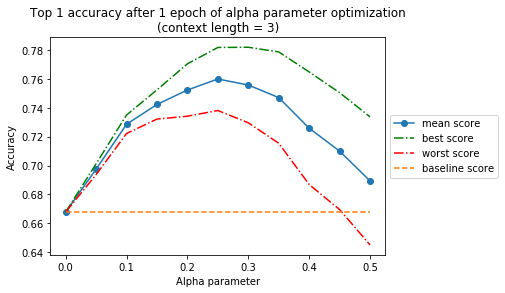

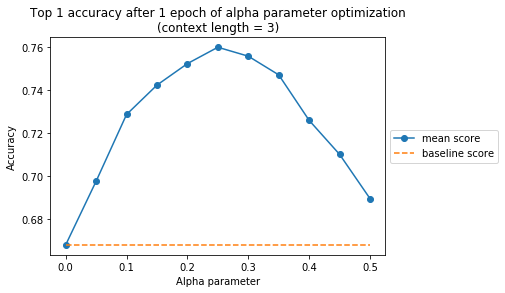

max top1_acc = 0.7598809523809523 at alpha = 0.25 


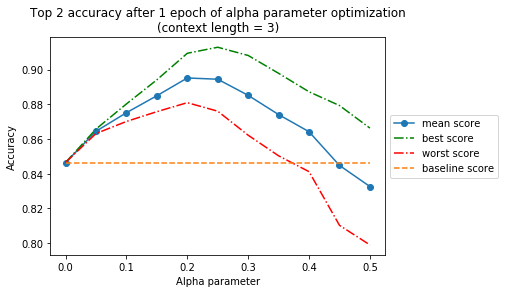

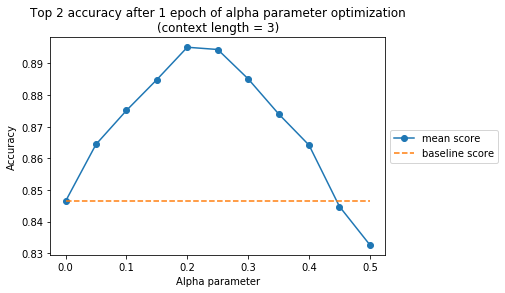

max top2_acc = 0.8951190476190476 at alpha = 0.2 


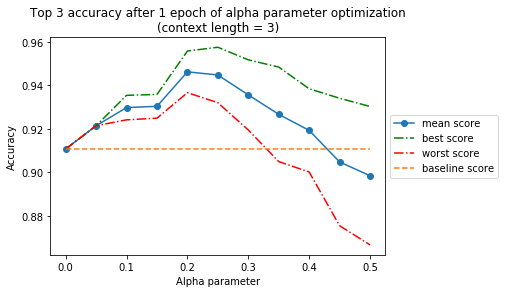

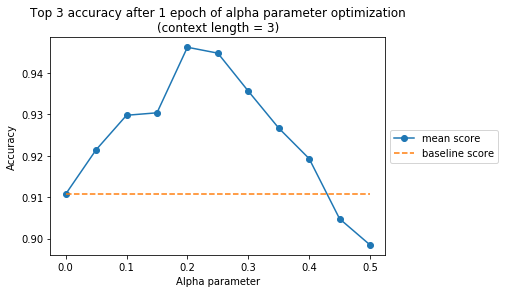

max top3_acc = 0.9461904761904765 at alpha = 0.2 


In [41]:
tested_top_ks = ["top1_acc", "top2_acc", "top3_acc"]
experiment = "alpha"
experiment_no = 2
subexperiment_no = 6
experiment_path_prefix = "../experiment{}/{}{}_".format(experiment_no, experiment, subexperiment_no)
with open(experiment_path_prefix + "0/args.txt") as f:
    data = json.load(f)
    assert(data["shuffle"])
    context = data["context"]
    used_parameters = "\n(" + exp_desc['context'].lower() + " = " + str(context) + ")"

for top_k in tested_top_ks:
    for use_std in [True, False]:
        fig_name = 'exp{}_{}_{}.png'.format(experiment_no, experiment, top_k)
        top_acc, std, tested_range = calc_top_std_and_range(experiment_path_prefix, top_k, experiment)
        plt.plot(tested_range, top_acc, 'o-', label="mean score")
        if use_std:
            plt.plot(tested_range, top_acc + 2*std, 'g-.', label="best score")
            plt.plot(tested_range, top_acc - 2*std, 'r-.', label="worst score")
            fig_name = 'exp{}_{}_{}_with_std.png'.format(experiment_no, experiment, top_k)

        plt.plot(tested_range, [top_acc[0] for _ in top_acc], '--', label="baseline score")

        plt.xlabel(exp_desc[experiment])
        plt.ylabel('Accuracy')
        plt.title( title_desc[top_k] + " after 1 epoch of " + exp_desc[experiment].lower() + " optimization" + used_parameters) 
        legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.savefig(fig_name, bbox_extra_artists=(legend,), bbox_inches='tight')
        plt.show()
    
    max_acc = top_acc.max()
    print('max {} = {} at {} = {} '.format(top_k, max_acc, experiment,tested_range[top_acc.idxmax()]))

### Experiment 3 - test different beta parameters with fixed alpha and context (alpha = 0.25, context = 3)

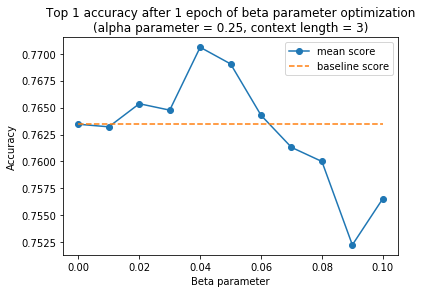

max top1_acc = 0.770595238095238 at beta = 0.04 
max relative top1_acc = 1.0093559956338685 at beta = 0.04 


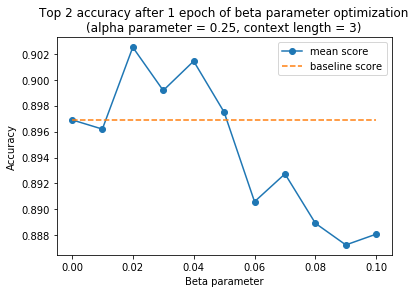

max top2_acc = 0.9025 at beta = 0.02 
max relative top2_acc = 1.006238385983541 at beta = 0.02 


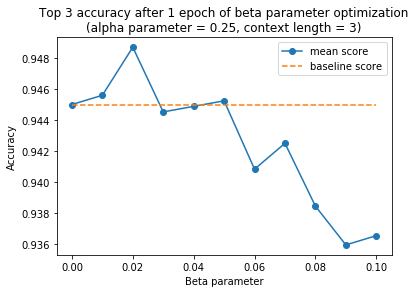

max top3_acc = 0.9486904761904763 at beta = 0.02 
max relative top3_acc = 1.0039052658100278 at beta = 0.02 


In [7]:
tested_top_ks = ["top1_acc", "top2_acc", "top3_acc"]
experiment = "beta"
experiment_no = 3
subexperiment_no = 1
experiment_path_prefix = "../experiment{}/{}{}_".format(experiment_no, experiment, subexperiment_no)
with open(experiment_path_prefix + '0/args.txt') as f:
    data = json.load(f)
    assert(data["shuffle"])
    context = data["context"]
    alpha = data["alpha"]
    used_parameters = "\n(" + \
        exp_desc['alpha'].lower() + " = " + str(alpha) + ", " + \
        exp_desc['context'].lower() + " = " + str(context) + ")"

for top_k in tested_top_ks:
    top_acc, _, tested_range = calc_top_std_and_range(experiment_path_prefix, top_k, experiment)
    plt.plot(tested_range, top_acc, 'o-', label="mean score")
    
    plt.plot(tested_range, [top_acc[0] for _ in top_acc], '--', label="baseline score")
    
    plt.xlabel(exp_desc[experiment])
    plt.ylabel('Accuracy')
    plt.title(title_desc[top_k] + " after 1 epoch of " + exp_desc[experiment].lower() + " optimization" + used_parameters) 
    plt.legend()
    plt.savefig('exp{}_{}_{}.png'.format(experiment_no, experiment, top_k))
    plt.show()
    
    max_acc = top_acc.max()
    print('max {} = {} at {} = {} '.format(top_k, max_acc, experiment,tested_range[top_acc.idxmax()]))
    print('max relative {} = {} at {} = {} '.format(top_k, max_acc/top_acc[0], experiment,tested_range[top_acc.idxmax()]))

### Experiment 4 - test longer training with fixed alpha, beta and context (alpha = 0.25, context = 3, beta = 0.04)

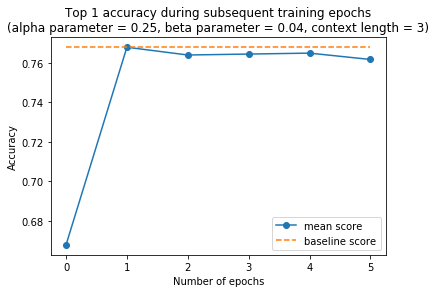

max top1_acc = 0.7679761904761905 at epoch = 1 


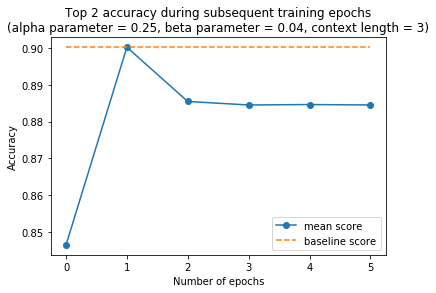

max top2_acc = 0.9002380952380954 at epoch = 1 


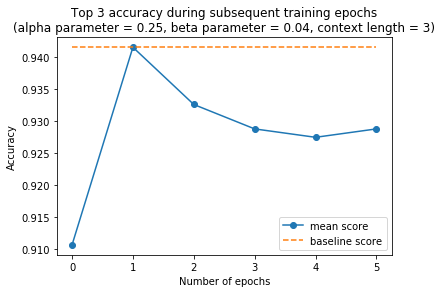

max top3_acc = 0.941547619047619 at epoch = 1 


In [49]:
tested_top_ks = ["top1_acc", "top2_acc", "top3_acc"]
experiment = "epoch"
experiment_no = 4
subexperiment_no = 12
experiment_path_prefix = "../experiment{}/{}s{}_".format(experiment_no, experiment, subexperiment_no)
with open(experiment_path_prefix + '0/args.txt') as f:
    data = json.load(f)
    assert(data["shuffle"])
    context = data["context"]
    alpha = data["alpha"]
    beta = data["beta"]
    used_parameters = "\n(" + \
        exp_desc['alpha'].lower() + " = " + str(alpha) + ", " + \
        exp_desc['beta'].lower() + " = " + str(beta) + ", " + \
        exp_desc['context'].lower() + " = " + str(context) + ")"

for top_k in tested_top_ks:
    top_acc, _, tested_range = calc_top_std_and_range(experiment_path_prefix, top_k, experiment)
    plt.plot(tested_range, top_acc, 'o-', label="mean score")
    
    plt.plot(tested_range, [top_acc[1] for _ in top_acc], '--', label="baseline score")

    plt.xlabel(exp_desc[experiment])
    plt.ylabel('Accuracy')
    plt.title(title_desc[top_k] + " during subsequent training epochs" + used_parameters) 
    plt.legend()
    plt.savefig('exp{}_{}_{}.png'.format(experiment_no, experiment, top_k))
    plt.show()
    
    max_acc = top_acc.max()
    print('max {} = {} at {} = {} '.format(top_k, max_acc, experiment,tested_range[top_acc.idxmax()]))

#### Testing epochs with lower parameters

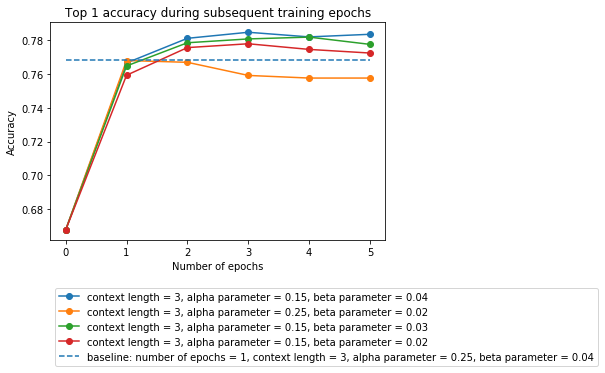

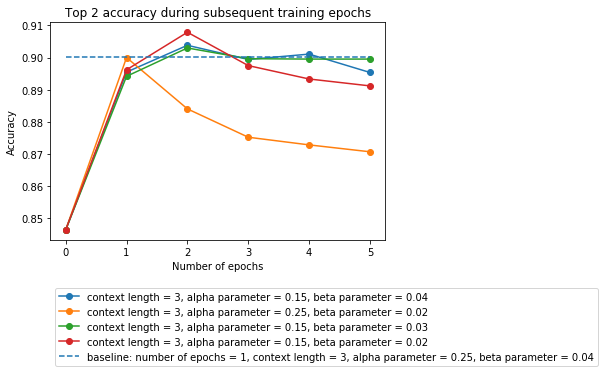

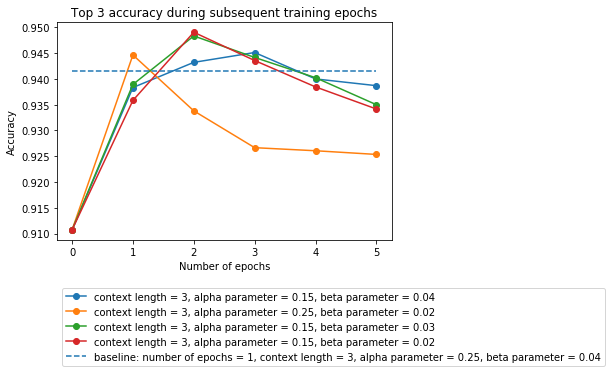

In [48]:
tested_top_ks = ["top1_acc", "top2_acc", "top3_acc"]
tested_subexperiments=[13, 14, 15, 16] # valid range(13,17)
experiment = "epoch"
experiment_no = 4

for top_k in tested_top_ks:

    # Draw configurations
    for subexperiment_no in tested_subexperiments:
        experiment_path_prefix = "../experiment{}/{}s{}_".format(experiment_no, experiment, subexperiment_no)
        with open(experiment_path_prefix + '0/args.txt') as f:
            data = json.load(f)
            assert(data["shuffle"])
            context = data["context"]
            alpha = data["alpha"]
            beta = data["beta"]
            used_parameters = "\n(" + \
                exp_desc['alpha'].lower() + " = " + str(alpha) + ", " + \
                exp_desc['beta'].lower() + " = " + str(beta) + ", " + \
                exp_desc['context'].lower() + " = " + str(context) + ")"
        
        top_acc, _, tested_range = calc_top_std_and_range(experiment_path_prefix, top_k, experiment)
        plt.plot(tested_range, top_acc, 'o-',label="context length = {}, alpha parameter = {}, beta parameter = {}".format(context, alpha, beta))
        
               
    # Calculate baseline
    major_subexperiment_no = 12
    baseline_experiment_path_prefix = "../experiment{}/{}s{}_".format(experiment_no, experiment, major_subexperiment_no)
    with open(baseline_experiment_path_prefix + '0/args.txt') as f:
        data = json.load(f)
        assert(data["shuffle"])
        context = data["context"]
        alpha = data["alpha"]
        beta = data["beta"]
    
    top_acc, _, tested_range = calc_top_std_and_range(baseline_experiment_path_prefix, top_k, experiment)
    plt.plot(tested_range, [top_acc[1] for _ in top_acc], 'C0--', label="baseline: number of epochs = 1, context length = {}, alpha parameter = {}, beta parameter = {}".format(context, alpha, beta))

    plt.xlabel(exp_desc[experiment])
    plt.ylabel('Accuracy')
    plt.title(title_desc[top_k] + " during subsequent training epochs") 
    legend = plt.legend(loc='center left', bbox_to_anchor=(0, -0.4))
    plt.savefig('exp{}_{}_multiconfiguration_{}.png'.format(experiment_no, experiment, top_k), bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()